In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import matplotlib.pyplot as plt


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("C:/Users/ilan/Documents/GitHub/MaterialyTareas/datos/regLin.csv")

In [4]:
df.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [5]:

# Here df.columns is a list of all the columns and df.columns[0:-1] is all columns minus the last which is y. 
# If the data had headers you could use column names: df[['column1','column2','etc']]
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

c:\users\ilan\virtualenv\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
# index for selecting data 0.75 is the percentage in training
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

In [7]:
# Separate both train and test as well as the response variable
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[df.columns[-1]])[index==1]
Y_test=np.array(df[df.columns[-1]])[index==0]

In [8]:
# Normalizar no ayuda mucho pero sale igual al de sklearn. Para que las alturas del pdf signifiquen lo mismo 
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

In [9]:
X_train[Y_train==1]

array([], shape=(0, 1), dtype=float64)

In [10]:
regr = linear_model.LinearRegression()

In [11]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([ 0.6047378]))


2.54368867071


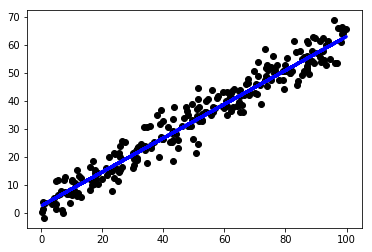

In [13]:
Y_pred = regr.predict(X_test)
intercept=regr.intercept_
print(intercept)
coef=regr.coef_
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)


plt.show()

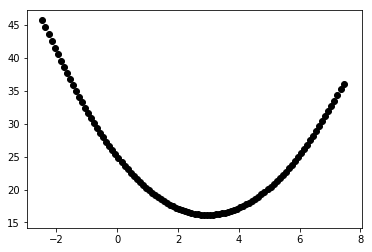

In [14]:
i=-50.0
while(i<50):
    Y_error=X_test*coef+intercept+i/10
    error= mean_squared_error(Y_test, Y_error)
    aux=intercept+i/10
    plt.scatter(aux, error,  color='black')
    i=i+1

plt.show()